# Business Understanding

The company is expanding into the shipping industry, necessitating purchasing and operating airplanes for shipping cargo purposes.  The company is unfamiliar with the potential risks of different types of aircraft, so here we are looking to determine which aircraft present the lowest risk in order to begin the new shipping endeavor.

# Data Understanding

Here we are working with a dataset provided by the National Transportation Safety Board which includes aviation accident data from 1962 through 2003 about civil aviation accidents and selected incidents in the United States and international waters.  Every incident has a unique event ID, and the data files provide the dates and types of each event, as well as other pertinent safety information (e.g. aircraft make and model, number of injuries).

In [209]:
import pandas as pd
import numpy as np

In [210]:
data = pd.read_csv('./data/Aviation_Data.csv', low_memory=False)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [4]:
data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [211]:
data['Event Date'] = pd.to_datetime(data['Event.Date'])
data['Event Date'].describe()

<ipython-input-211-ab274c447368>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data['Event Date'].describe()


count                   88889
unique                  14782
top       1982-05-16 00:00:00
freq                       25
first     1948-10-24 00:00:00
last      2022-12-29 00:00:00
Name: Event Date, dtype: object

In [117]:
data['Make'].value_counts()

Cessna                       9106
Piper                        4078
CESSNA                       2117
Beech                        1689
Bell                         1564
                             ... 
Goodyear Aerospace              1
Gulfstream American Corp        1
Sorrel                          1
Zlin                            1
CIRRUS DESIGN CORPORATION       1
Name: Make, Length: 1055, dtype: int64

In [7]:
data['Injury.Severity'].value_counts()

Non-Fatal     67357
Fatal(1)       6167
Fatal          5262
Fatal(2)       3711
Incident       2219
              ...  
Fatal(121)        1
Fatal(123)        1
Fatal(96)         1
Fatal(111)        1
Fatal(49)         1
Name: Injury.Severity, Length: 109, dtype: int64

In [8]:
data['Number.of.Engines'].value_counts()

1.0    69582
2.0    11079
0.0     1226
3.0      483
4.0      431
8.0        3
6.0        1
Name: Number.of.Engines, dtype: int64

In [9]:
data['Investigation.Type'].value_counts()

Accident      85015
Incident       3874
25-09-2020      702
26-09-2020       60
02-02-2021       39
              ...  
03-11-2020        1
31-03-2021        1
05-01-2021        1
04-03-2021        1
05-08-2022        1
Name: Investigation.Type, Length: 71, dtype: int64

In [10]:
data['Aircraft.Category'].value_counts()

Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
ULTR                     1
Rocket                   1
Name: Aircraft.Category, dtype: int64

In [11]:
data['Amateur.Built'].value_counts()

No     80312
Yes     8475
Name: Amateur.Built, dtype: int64

In [12]:
data['FAR.Description'].value_counts()

091                               18221
Part 91: General Aviation          6486
NUSN                               1584
NUSC                               1013
137                                1010
135                                 746
121                                 679
Part 137: Agricultural              437
UNK                                 371
Part 135: Air Taxi & Commuter       298
PUBU                                253
129                                 246
Part 121: Air Carrier               165
133                                 107
Part 129: Foreign                   100
Non-U.S., Non-Commercial             97
Non-U.S., Commercial                 93
Part 133: Rotorcraft Ext. Load       32
Unknown                              22
Public Use                           19
091K                                 14
ARMF                                  8
125                                   5
Part 125: 20+ Pax,6000+ lbs           5
107                                   4


In [13]:
data['Schedule'].value_counts()

NSCH    4474
UNK     4099
SCHD    4009
Name: Schedule, dtype: int64

In [14]:
data['Report.Status'].value_counts()

Probable Cause                                                                                                                                                                                                                 61754
Foreign                                                                                                                                                                                                                         1999
<br /><br />                                                                                                                                                                                                                     167
Factual                                                                                                                                                                                                                          145
The pilot's failure to maintain directional control during the landing roll.        

In [15]:
data['Aircraft.damage'].value_counts()

Substantial    64148
Destroyed      18623
Minor           2805
Unknown          119
Name: Aircraft.damage, dtype: int64

In [16]:
data['Engine.Type'].value_counts()

Reciprocating      69530
Turbo Shaft         3609
Turbo Prop          3391
Turbo Fan           2481
Unknown             2051
Turbo Jet            703
None                  19
Geared Turbofan       12
Electric              10
LR                     2
NONE                   2
UNK                    1
Hybrid Rocket          1
Name: Engine.Type, dtype: int64

In [17]:
data['Weather.Condition'].value_counts()

VMC    77303
IMC     5976
UNK      856
Unk      262
Name: Weather.Condition, dtype: int64

In [18]:
data['Broad.phase.of.flight'].value_counts()

Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Unknown          548
Other            119
Name: Broad.phase.of.flight, dtype: int64

In [19]:
data['Number.of.Engines'].value_counts()

1.0    69582
2.0    11079
0.0     1226
3.0      483
4.0      431
8.0        3
6.0        1
Name: Number.of.Engines, dtype: int64

The dataset includes records from 1982 through 2002.  It includes a wide variety of aircraft types, makes and models.  Most injuries are non-fatal.  While some aircraft have 2+ engines, a significant majority have only one engine.  Exploring all data to help determine its relevance to the business problem.

## Data Preparation

I make the data easier to work with by dropping unnecessary columns which contain irrelevant information, as well as records/rows relating to obviously irrelevant incidents (ie. since we are interested in the safest airplanes only, we are removing ameteur built aircraft as well as things like helicopters, parachutes, etc.)

In [212]:
data.drop(columns = ['Event.Id', 'Investigation.Type', 'Accident.Number', 'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Registration.Number', 'FAR.Description', 'Schedule', 'Air.carrier', 'Report.Status', 'Publication.Date', 'Broad.phase.of.flight'], inplace=True)

In [21]:
data.head()

,Event.Date,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Event Date
0,1948-10-24,Fatal(2),Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,1948-10-24
1,1962-07-19,Fatal(4),Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,1962-07-19
2,1974-08-30,Fatal(3),Destroyed,NaN,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,1974-08-30
3,1977-06-19,Fatal(2),Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,1977-06-19
4,1979-08-02,Fatal(1),Destroyed,NaN,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,1979-08-02


In [213]:
data.drop(data[data['Amateur.Built'] == 'Yes'].index, inplace=True)

In [214]:
data.drop(data[data['Purpose.of.flight'] == 'Personal'].index, inplace=True)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39866 entries, 5 to 90344
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Date              38407 non-null  object        
 1   Injury.Severity         37424 non-null  object        
 2   Aircraft.damage         35580 non-null  object        
 3   Aircraft.Category       14122 non-null  object        
 4   Make                    38361 non-null  object        
 5   Model                   38343 non-null  object        
 6   Amateur.Built           38325 non-null  object        
 7   Number.of.Engines       33935 non-null  float64       
 8   Engine.Type             33589 non-null  object        
 9   Purpose.of.flight       32271 non-null  object        
 10  Total.Fatal.Injuries    33365 non-null  float64       
 11  Total.Serious.Injuries  32970 non-null  float64       
 12  Total.Minor.Injuries    33142 non-null  float6

In [25]:
data.head()

,Event.Date,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Event Date
5,1979-09-17,Non-Fatal,Substantial,Airplane,Mcdonnell Douglas,DC9,No,2.0,Turbo Fan,NaN,NaN,NaN,1.0,44.0,VMC,1979-09-17
8,1982-01-01,Non-Fatal,Substantial,Airplane,Cessna,401B,No,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,1982-01-01
20,1982-01-02,Non-Fatal,Substantial,Airplane,Cessna,152,No,1.0,Reciprocating,Instructional,0.0,0.0,0.0,1.0,VMC,1982-01-02
22,1982-01-02,Non-Fatal,Substantial,Helicopter,Bell,206L-1,No,1.0,Turbo Shaft,Unknown,0.0,0.0,0.0,1.0,VMC,1982-01-02
25,1982-01-03,Fatal(8),Destroyed,Airplane,Cessna,414A,No,2.0,Reciprocating,Business,8.0,0.0,0.0,0.0,IMC,1982-01-03


In [215]:
non_airplanes = ['Helicopter', 'Glider', 'Balloon', 'Gyrocraft', 'Weight-Shift', 'Powered Parachute', 'Ultralight', 'Unknown', 'WSFT', 'Powered-Lift', 'Blimp', 'UNK', 'Rocket', 'ULTR' ]
data = data[~data['Aircraft.Category'].isin(non_airplanes)]

In [216]:
data['Make'] = data['Make'].str.lower()

In [217]:
data['Make'].value_counts()

cessna                   11247
piper                     5101
boeing                    2439
beech                     2067
bell                      1599
                         ...  
firefly balloon, inc.        1
c a tecnam srl               1
moyes                        1
eiriavion oy                 1
bell-campbell                1
Name: Make, Length: 869, dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36836 entries, 5 to 90344
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Date              35377 non-null  object        
 1   Injury.Severity         34464 non-null  object        
 2   Aircraft.damage         32679 non-null  object        
 3   Aircraft.Category       11092 non-null  object        
 4   Make                    35332 non-null  object        
 5   Model                   35313 non-null  object        
 6   Amateur.Built           35297 non-null  object        
 7   Number.of.Engines       31481 non-null  float64       
 8   Engine.Type             31404 non-null  object        
 9   Purpose.of.flight       29941 non-null  object        
 10  Total.Fatal.Injuries    30659 non-null  float64       
 11  Total.Serious.Injuries  30248 non-null  float64       
 12  Total.Minor.Injuries    30390 non-null  float6

In [218]:
data.drop(columns = ['Aircraft.Category'], inplace=True)

In [219]:
data.drop(columns = ['Amateur.Built'], inplace=True)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36836 entries, 5 to 90344
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Date              35377 non-null  object        
 1   Injury.Severity         34464 non-null  object        
 2   Aircraft.damage         32679 non-null  object        
 3   Make                    35332 non-null  object        
 4   Model                   35313 non-null  object        
 5   Number.of.Engines       31481 non-null  float64       
 6   Engine.Type             31404 non-null  object        
 7   Purpose.of.flight       29941 non-null  object        
 8   Total.Fatal.Injuries    30659 non-null  float64       
 9   Total.Serious.Injuries  30248 non-null  float64       
 10  Total.Minor.Injuries    30390 non-null  float64       
 11  Total.Uninjured         33156 non-null  float64       
 12  Weather.Condition       32007 non-null  object

In [34]:
data.head()

,Event.Date,Injury.Severity,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Event Date
5,1979-09-17,Non-Fatal,Substantial,Mcdonnell Douglas,DC9,2.0,Turbo Fan,NaN,NaN,NaN,1.0,44.0,VMC,1979-09-17
8,1982-01-01,Non-Fatal,Substantial,Cessna,401B,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,1982-01-01
20,1982-01-02,Non-Fatal,Substantial,Cessna,152,1.0,Reciprocating,Instructional,0.0,0.0,0.0,1.0,VMC,1982-01-02
25,1982-01-03,Fatal(8),Destroyed,Cessna,414A,2.0,Reciprocating,Business,8.0,0.0,0.0,0.0,IMC,1982-01-03
31,1982-01-03,Non-Fatal,Substantial,Air Tractor,AT-301,1.0,Reciprocating,Ferry,0.0,0.0,0.0,1.0,VMC,1982-01-03


# Exploratory Data Analysis

In [220]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [36]:
data['Number.of.Engines'].value_counts()

1.0    22723
2.0     7570
3.0      477
4.0      416
0.0      293
6.0        1
8.0        1
Name: Number.of.Engines, dtype: int64

In [221]:
data = data[~data['Number.of.Engines'].isin([0.0, 6.0, 8.0])]

In [222]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36541 entries, 5 to 90344
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Date              35082 non-null  object        
 1   Injury.Severity         34169 non-null  object        
 2   Aircraft.damage         32427 non-null  object        
 3   Make                    35037 non-null  object        
 4   Model                   35018 non-null  object        
 5   Number.of.Engines       31186 non-null  float64       
 6   Engine.Type             31159 non-null  object        
 7   Purpose.of.flight       29647 non-null  object        
 8   Total.Fatal.Injuries    30441 non-null  float64       
 9   Total.Serious.Injuries  30013 non-null  float64       
 10  Total.Minor.Injuries    30165 non-null  float64       
 11  Total.Uninjured         32907 non-null  float64       
 12  Weather.Condition       31713 non-null  object

In [223]:
data.shape

(36541, 14)

In [158]:
data['Number.of.Engines'].value_counts()

1.0    22723
2.0     7570
3.0      477
4.0      416
Name: Number.of.Engines, dtype: int64

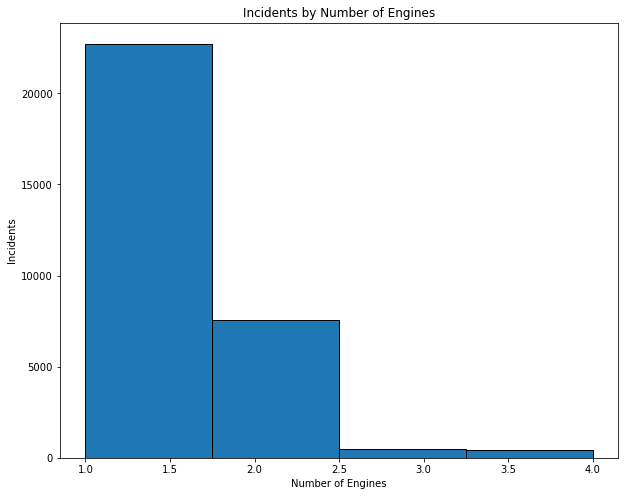

In [225]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.hist(data['Number.of.Engines'], bins=4, edgecolor='black')
ax.set_xlabel("Number of Engines")
ax.set_ylabel("Incidents")
ax.set_title("Incidents by Number of Engines")
plt.show()

In [161]:
data['Engine.Type'].value_counts()

Reciprocating      22517
Turbo Prop          2879
Turbo Fan           2378
Turbo Shaft         2076
Unknown              686
Turbo Jet            607
Geared Turbofan       12
Electric               3
UNK                    1
Name: Engine.Type, dtype: int64

In [226]:
data.drop(data[data['Engine.Type'].isin(['Geared Turbofan', 'Electric', 'UNK'])].index, inplace=True)

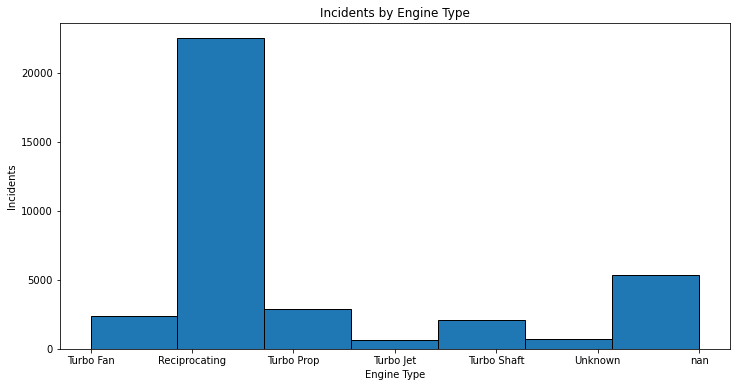

In [227]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.hist(data['Engine.Type'], bins=7, edgecolor='black')
ax.set_xlabel("Engine Type")
ax.set_ylabel("Incidents")
ax.set_title("Incidents by Engine Type")
plt.show()

In [228]:
safest_aircraft = data[data['Number.of.Engines'] != 1.0]

In [119]:
safest_aircraft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13818 entries, 5 to 90344
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Date              12359 non-null  object        
 1   Injury.Severity         11475 non-null  object        
 2   Aircraft.damage         9886 non-null   object        
 3   Make                    12314 non-null  object        
 4   Model                   12302 non-null  object        
 5   Number.of.Engines       8463 non-null   float64       
 6   Engine.Type             8938 non-null   object        
 7   Purpose.of.flight       7748 non-null   object        
 8   Total.Fatal.Injuries    10627 non-null  float64       
 9   Total.Serious.Injuries  10385 non-null  float64       
 10  Total.Minor.Injuries    10282 non-null  float64       
 11  Total.Uninjured         11409 non-null  float64       
 12  Weather.Condition       9354 non-null   object

In [164]:
safest_aircraft['Make'].value_counts()

boeing                         2341
cessna                         1988
piper                          1460
beech                          1374
mcdonnell douglas               486
                               ... 
aficionado                        1
md helicopters                    1
stearman                          1
indonesian aerospace              1
aerostar international inc.       1
Name: Make, Length: 435, dtype: int64

In [229]:
safest_aircraft = safest_aircraft[safest_aircraft['Engine.Type'] != 'Reciprocating']

In [166]:
safest_aircraft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10451 entries, 5 to 90344
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Date              8992 non-null   object        
 1   Injury.Severity         8113 non-null   object        
 2   Aircraft.damage         6568 non-null   object        
 3   Make                    8947 non-null   object        
 4   Model                   8935 non-null   object        
 5   Number.of.Engines       5248 non-null   float64       
 6   Engine.Type             5571 non-null   object        
 7   Purpose.of.flight       4676 non-null   object        
 8   Total.Fatal.Injuries    7567 non-null   float64       
 9   Total.Serious.Injuries  7392 non-null   float64       
 10  Total.Minor.Injuries    7297 non-null   float64       
 11  Total.Uninjured         8218 non-null   float64       
 12  Weather.Condition       6084 non-null   object

In [167]:
safest_aircraft['Make'].value_counts()

boeing                         2334
cessna                          952
beech                           676
mcdonnell douglas               484
piper                           389
                               ... 
aero vodochody                    1
zenair                            1
rockwell commander                1
hawker siddely                    1
aerostar international inc.       1
Name: Make, Length: 389, dtype: int64

In [169]:
safest_aircraft['Aircraft.damage'].value_counts()

Substantial    3118
Destroyed      1740
Minor          1659
Unknown          51
Name: Aircraft.damage, dtype: int64

In [230]:
safest_aircraft.drop(safest_aircraft[safest_aircraft['Aircraft.damage'].isin(['Substantial', 'Destroyed'])].index, inplace=True)

In [231]:
safest_aircraft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5581 entries, 79 to 90344
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Date              4122 non-null   object        
 1   Injury.Severity         3412 non-null   object        
 2   Aircraft.damage         1709 non-null   object        
 3   Make                    4094 non-null   object        
 4   Model                   4090 non-null   object        
 5   Number.of.Engines       2585 non-null   float64       
 6   Engine.Type             2556 non-null   object        
 7   Purpose.of.flight       1747 non-null   object        
 8   Total.Fatal.Injuries    3440 non-null   float64       
 9   Total.Serious.Injuries  3564 non-null   float64       
 10  Total.Minor.Injuries    3483 non-null   float64       
 11  Total.Uninjured         3985 non-null   float64       
 12  Weather.Condition       2509 non-null   object

In [232]:
top_5_makes = safest_aircraft['Make'].value_counts().nlargest(3).index

In [233]:
safest_aircraft = safest_aircraft[safest_aircraft['Make'].isin(top_5_makes)]
print (safest_aircraft)

       Event.Date Injury.Severity Aircraft.damage    Make      Model  \
320    1982-02-15        Incident           Minor  boeing   B737-2H4   
351    1982-02-19        Incident             NaN  boeing  B-727-200   
506    1982-03-08        Incident             NaN  boeing   707-131B   
796    1982-04-09        Incident           Minor  boeing    727-200   
1834   1982-07-05        Incident           Minor  boeing    727-233   
...           ...             ...             ...     ...        ...   
90285  2022-11-26       Non-Fatal             NaN  boeing    737-800   
90308  2022-12-05             NaN             NaN  boeing        737   
90310  2022-12-05       Non-Fatal             NaN  boeing    737-800   
90314  2022-12-08         Serious             NaN  boeing    767-322   
90338  2022-12-18             NaN             NaN  airbus   A330-243   

       Number.of.Engines Engine.Type Purpose.of.flight  Total.Fatal.Injuries  \
320                  2.0   Turbo Jet           Unknown 

In [234]:
safest_aircraft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2330 entries, 320 to 90338
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Date              2330 non-null   object        
 1   Injury.Severity         1799 non-null   object        
 2   Aircraft.damage         915 non-null    object        
 3   Make                    2330 non-null   object        
 4   Model                   2326 non-null   object        
 5   Number.of.Engines       1441 non-null   float64       
 6   Engine.Type             1348 non-null   object        
 7   Purpose.of.flight       814 non-null    object        
 8   Total.Fatal.Injuries    1960 non-null   float64       
 9   Total.Serious.Injuries  2037 non-null   float64       
 10  Total.Minor.Injuries    1996 non-null   float64       
 11  Total.Uninjured         2237 non-null   float64       
 12  Weather.Condition       1275 non-null   objec

In [235]:
safest_aircraft.head()

,Event.Date,Injury.Severity,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Event Date
320,1982-02-15,Incident,Minor,boeing,B737-2H4,2.0,Turbo Jet,Unknown,0.0,0.0,0.0,119.0,IMC,1982-02-15
351,1982-02-19,Incident,NaN,boeing,B-727-200,3.0,Turbo Jet,NaN,NaN,NaN,NaN,83.0,IMC,1982-02-19
506,1982-03-08,Incident,NaN,boeing,707-131B,4.0,Turbo Fan,Unknown,1.0,0.0,0.0,0.0,VMC,1982-03-08
796,1982-04-09,Incident,Minor,boeing,727-200,3.0,Turbo Fan,Unknown,0.0,0.0,0.0,108.0,IMC,1982-04-09
1834,1982-07-05,Incident,Minor,boeing,727-233,3.0,Turbo Fan,NaN,NaN,NaN,NaN,74.0,VMC,1982-07-05


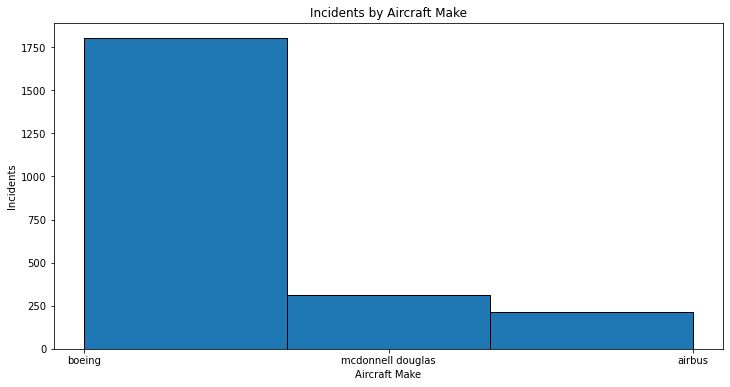

In [236]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.hist(safest_aircraft['Make'], bins=3, edgecolor='black')
ax.set_xlabel("Aircraft Make")
ax.set_ylabel("Incidents")
ax.set_title("Incidents by Aircraft Make")
plt.show()

# Conclusions

1) Aircraft with multiple engines are more reliable.  Overwhelmingly, aircraft involved in incidents are single engine aircraft.
2) Turbo fan engines appear most reliable, though avoiding reciprocating engines seems most crucial when it comes to engine type.
3) Boeing and Airbus made aircraft are safest due to their overall reliability.

## Limitations

The dataset outlines incidents only and does not include information on the total number of aircraft or total flights, leaving room for more precision using a more complete dataset.

## Recommendations

## Next Steps

Evaluating cost and other variables will be crucial, such as ease of service and repair, as well as ability to modify for business purposes, since these considerations will factor into choosing aircraft to purchase.